In [1]:
%pip install importlib-metadata==4.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive, data_table
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#CALIOP



In [ ]:
! pip install pyhdf
! apt-get install -qq libgdal-dev libproj-dev
! pip install --no-binary shapely shapely --force
! pip install cartopy
! pip install pynufft

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 703 kB 7.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669766 sha256=946700511404aece02a85bc1a9181235ef1165481553cb07b42f24d4264d84da
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simp

In [ ]:
import pdb
import numpy as np
import datetime as dt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pyhdf.HDF import *
from pyhdf.V   import *
from pyhdf.VS  import *
from pyhdf.SD  import *

In [ ]:
# filename = '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Óptica de Fourier/CAL_LID_L1-Standard-V4-11.2020-07-01T19-02-25ZD_Subset.hdf'
filename = '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Óptica de Fourier/CAL_LID_L1-Standard-V4-11.2020-07-01T08-24-53ZN_Subset.hdf'
# filename = '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Óptica de Fourier/CAL_LID_L1-Standard-V4-11.2020-07-01T23-11-35ZN_Subset.hdf'

## Quicklook

In [ ]:
hdf = SD(filename, SDC.READ)
hdf

In [ ]:
hdf.attributes()


{'Subsetter_title': 'ASDC CALIPSO Subset ',
 'Subsetter_version': '2.5.b1 ',
 'Subsetter_institution': 'Atmospheric Science Data Center (ASDC) http://eosweb.larc.nasa.gov ',
 'Subsetter_source': 'CAL_LID_L1-Standard-V4-11.2020-07-01T08-24-53ZN.hdf ',
 'Subsetter_history': '2022-06-13T15:38:59 -0400 SubsetCalipso ',
 'Subsetter_temporalFilter': '2020-07-01T00:00:00.000000Z to 2020-07-01T23:59:59.999999Z ',
 'Subsetter_spatialFilter': 'none '}

In [ ]:
keys = hdf.datasets().keys()
keys

dict_keys(['Latitude', 'Longitude', 'Profile_Time', 'Profile_UTC_Time', 'Day_Night_Flag', 'GMAO_Surface_Elevation', 'IGBP_Surface_Type', 'Land_Water_Mask', 'Off_Nadir_Angle', 'Profile_ID', 'QC_Flag', 'QC_Flag_2', 'Snow_Ice_Surface_Type', 'Surface_Elevation', 'Calibration_Constant_532', 'Calibration_Constant_Uncertainty_532', 'Depolarization_Gain_Ratio_532', 'Depolarization_Gain_Ratio_Uncertainty_532', 'Laser_Energy_532', 'Molecular_Number_Density', 'Noise_Scale_Factor_532_Parallel', 'Noise_Scale_Factor_532_Perpendicular', 'Ozone_Number_Density', 'Parallel_Amplifier_Gain_532', 'Parallel_Background_Monitor_532', 'Perpendicular_Amplifier_Gain_532', 'Perpendicular_Background_Monitor_532', 'Parallel_RMS_Baseline_532', 'Perpendicular_Attenuated_Backscatter_532', 'Perpendicular_RMS_Baseline_532', 'Total_Attenuated_Backscatter_532'])

In [ ]:
Tab532 = hdf.select('Total_Attenuated_Backscatter_532')
tab532 = Tab532[:,:]
tab532[:,:].shape

(56040, 583)

In [ ]:
range = Tab532.attributes()['valid_range']

smin, smax = range.split("...")
valid_min = float(smin)
valid_max = float(smax)
_FillValue = Tab532.attributes()['fillvalue']

invalid = np.logical_or(tab532 > valid_max,
                        tab532 < valid_min)
invalid = np.logical_or(invalid, tab532 == _FillValue)
tab532[invalid] = np.nan

Tab532.attributes(), tab532

({'units': 'per kilometer per steradian',
  'format': 'Float_32',
  'valid_range': '-0.1...3.3',
  'fillvalue': -9999.0},
 array([[ 1.39065496e-05,  4.47534785e-06, -1.62077606e-06, ...,
          6.38433539e-06, -1.23817119e-06, -4.61498871e-07],
        [ 1.39067661e-05,  4.47541788e-06, -1.62080141e-06, ...,
          5.69754820e-06,  2.18858031e-06,  1.32820860e-05],
        [ 1.39069825e-05,  4.47548791e-06, -1.62082665e-06, ...,
         -1.38792320e-05,  3.86121110e-06, -7.07324352e-06],
        ...,
        [ 1.27617909e-06, -7.48213415e-06,  5.99423765e-05, ...,
          1.51578424e-05, -5.68946371e-06,  1.25240667e-05],
        [ 1.27612452e-06, -7.48181492e-06,  5.99398227e-05, ...,
          1.65345147e-04,  8.70888925e-06,  1.75690675e-05],
        [ 1.27607018e-06, -7.48149705e-06,  5.99372761e-05, ...,
          3.57085846e-05,  1.13193892e-05,  4.95218483e-05]], dtype=float32))

In [ ]:
Time = hdf.select('Profile_Time')
time = Time[:]
time

array([[8.67745502e+08],
       [8.67745502e+08],
       [8.67745502e+08],
       ...,
       [8.67748281e+08],
       [8.67748281e+08],
       [8.67748281e+08]])

In [ ]:
Latitude = hdf.select('Latitude')
latitude = Latitude[:]

Longitude = hdf.select('Longitude')
longitude = Longitude[:]

latitude.shape, longitude.shape

((56040, 1), (56040, 1))

In [ ]:
surface_elevation = hdf.select('GMAO_Surface_Elevation')
surface_elevation[:]

array([[0.10680333],
       [0.10680336],
       [0.10680338],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [ ]:
latitude, longitude

(array([[ 54.466324],
        [ 54.463417],
        [ 54.46051 ],
        ...,
        [-64.8511  ],
        [-64.84829 ],
        [-64.84548 ]], dtype=float32), array([[-84.11195 ],
        [-84.11344 ],
        [-84.11493 ],
        ...,
        [ 90.52656 ],
        [ 90.523994],
        [ 90.52143 ]], dtype=float32))

In [ ]:
hdf_interface = HDF(filename)
vs_interface  = hdf_interface.vstart()

In [ ]:
meta = vs_interface.attach("metadata")
meta

In [ ]:
field_infos = meta.fieldinfo()
field_infos

[('Product_ID', 4, 80, 0, 0, 80, 80),
 ('Date_Time_at_Granule_Start', 4, 27, 0, 1, 27, 27),
 ('Date_Time_at_Granule_End', 4, 27, 0, 2, 27, 27),
 ('Initial_Subsatellite_Latitude', 5, 1, 0, 3, 4, 4),
 ('Initial_Subsatellite_Longitude', 5, 1, 0, 4, 4, 4),
 ('Final_Subsatellite_Latitude', 5, 1, 0, 5, 4, 4),
 ('Final_Subsatellite_Longitude', 5, 1, 0, 6, 4, 4),
 ('Rayleigh_Extinction_Cross-section_532', 5, 1, 0, 7, 4, 4),
 ('Rayleigh_Extinction_Cross-section_1064', 5, 1, 0, 8, 4, 4),
 ('Rayleigh_Backscatter_Cross-section_532', 5, 1, 0, 9, 4, 4),
 ('Rayleigh_Backscatter_Cross-section_1064', 5, 1, 0, 10, 4, 4),
 ('Ozone_Absorption_Cross-section_532', 5, 1, 0, 11, 4, 4),
 ('Ozone_Absorption_Cross-section_1064', 5, 1, 0, 12, 4, 4),
 ('Lidar_Data_Altitudes', 5, 583, 0, 13, 2332, 2332),
 ('Met_Data_Altitudes', 5, 33, 0, 14, 132, 132)]

In [ ]:
all_data = meta.read(meta._nrecs)[0]
all_data

['L1_LIDAR_Science                                                                ',
 '2020-07-01T08:24:51.556000Z',
 '2020-07-01T09:11:10.981399Z',
 54.46632385253906,
 -84.11195373535156,
 -64.8454818725586,
 90.52143096923828,
 5.167000147288005e-31,
 3.1270001135475393e-32,
 5.929999894672282e-32,
 3.591999964793912e-33,
 2.728461069538629e-25,
 0.0,
 [39.79566955566406,
  39.49628829956055,
  39.19690704345703,
  38.89752197265625,
  38.598140716552734,
  38.29875946044922,
  37.9993782043457,
  37.69999694824219,
  37.40061569213867,
  37.101234436035156,
  36.80185317993164,
  36.502471923828125,
  36.20309066772461,
  35.903709411621094,
  35.60432434082031,
  35.3049430847168,
  35.00556182861328,
  34.706180572509766,
  34.40679931640625,
  34.107418060302734,
  33.80803680419922,
  33.5086555480957,
  33.20927429199219,
  32.90989303588867,
  32.610511779785156,
  32.311126708984375,
  32.01174545288086,
  31.712366104125977,
  31.412982940673828,
  31.113601684570312,
  30.

In [ ]:
meta.detach()

In [ ]:
data_dictionary = {}
field_name_index = 0

for field_info, data in zip(field_infos, all_data):
  data_dictionary[field_info[field_name_index]] = data
lidar_altitudes = data_dictionary["Lidar_Data_Altitudes"]

In [ ]:
dts = [dt.datetime.fromtimestamp(float(t + dt.datetime.timestamp(dt.datetime(year=1993, 
                                                                       month=1, 
                                                                       day=1, 
                                                                       hour=0, 
                                                                       minute=0, 
                                                                       second=0, 
                                                                       microsecond=0)))) for t in time]
# dts

In [ ]:
# pdb.set_trace()
pos_labels = ["\n".join((str(longitude[i][0]), str(latitude[i][0]))) for i in np.arange(len(longitude))]
pos_labels

['-84.11195\n54.466324',
 '-84.11344\n54.463417',
 '-84.11493\n54.46051',
 '-84.11642\n54.457603',
 '-84.1179\n54.454697',
 '-84.119385\n54.45179',
 '-84.12087\n54.448883',
 '-84.12236\n54.445976',
 '-84.12384\n54.443058',
 '-84.12531\n54.44012',
 '-84.126785\n54.43718',
 '-84.12826\n54.434242',
 '-84.12973\n54.431305',
 '-84.1312\n54.428364',
 '-84.132675\n54.425426',
 '-84.13415\n54.42249',
 '-84.13562\n54.419548',
 '-84.13709\n54.41661',
 '-84.138565\n54.413673',
 '-84.14004\n54.410732',
 '-84.1415\n54.407795',
 '-84.142975\n54.404858',
 '-84.14445\n54.401917',
 '-84.14592\n54.39898',
 '-84.147385\n54.39604',
 '-84.14886\n54.3931',
 '-84.15033\n54.390163',
 '-84.151794\n54.387226',
 '-84.15327\n54.384285',
 '-84.15474\n54.381348',
 '-84.156204\n54.378407',
 '-84.15767\n54.375477',
 '-84.15913\n54.372547',
 '-84.16058\n54.369617',
 '-84.16204\n54.366688',
 '-84.1635\n54.363758',
 '-84.164955\n54.360832',
 '-84.166405\n54.357903',
 '-84.16786\n54.354973',
 '-84.16932\n54.352043',
 '-8

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naci

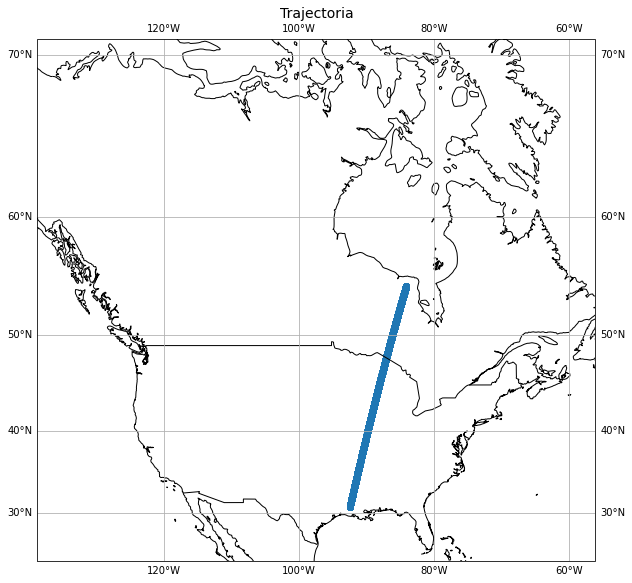

In [ ]:
scale_lonsfactor = 1.5 # Variar entre 1 y 2 para ajustar la escala
scale_latsfactor = 1.3

min_profile = 0
# max_profile = -1
max_profile = 8000
profiles_slice = slice(min_profile, max_profile)

xfig = plt.figure(figsize=(10,10))

mrc = ccrs.Mercator()

# lim_lons = np.array([-84, -65])
# lim_lons = np.array([-179, 179])
lim_lons = np.array([-120, -60])
# lim_lats = np.array([-10, 16])
# lim_lats = np.array([-89, 89])
lim_lats = np.array([20, 60])

lim_lons = np.array([longitude[profiles_slice].min()*scale_lonsfactor**(-np.sign(longitude[profiles_slice].min())), longitude[profiles_slice].max()*scale_lonsfactor**np.sign(longitude[profiles_slice].max())])
lim_lats = np.array([latitude[profiles_slice].min()*scale_latsfactor**(-np.sign(latitude[profiles_slice].min())), latitude[profiles_slice].max()*scale_latsfactor**np.sign(latitude[profiles_slice].max())])


lim_cords = mrc.transform_points(ccrs.PlateCarree(), lim_lons, lim_lats)

# x_lim = [longitude[0:I].min()*scale_factor, longitude[0:I].max()*scale_factor]
# y_lim = [latitude[0:I].min()*scale_factor, latitude[0:I].max()*scale_factor]

x_lim = [lim_cords[0, 0], lim_cords[1, 0]]
y_lim = [lim_cords[0, 1], lim_cords[1, 1]]



# pdb.set_trace()

postitons = mrc.transform_points(ccrs.PlateCarree(), longitude, latitude)
positions = np.squeeze(postitons)
x = positions[:, 0]
y = positions[:, 1]


ax = plt.axes(projection = ccrs.Mercator())
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
# pdb.set_trace()
# i = 5500




ax.scatter(x[profiles_slice], y[profiles_slice])
# ax.scatter(x[I], y[I])

ax.gridlines(draw_labels=True)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
plt.title('Trajectoria', fontsize=14)
plt.show()


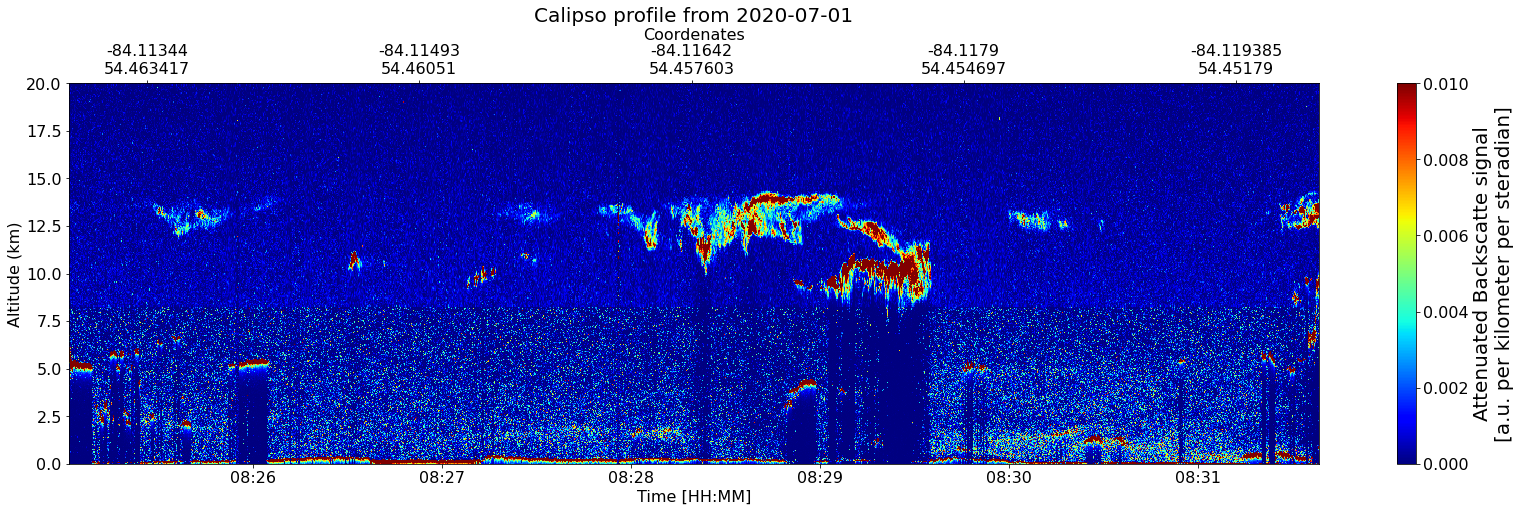

In [ ]:
# fig = plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize=[28,7])
# pdb.set_trace()
plt.title('Calipso profile from {date}'.format(date=dts[0].date().strftime('%Y-%m-%d')), fontsize=20)

plt.pcolormesh(dts[profiles_slice], lidar_altitudes, tab532[profiles_slice].T, vmin=0, vmax=0.01, cmap='jet')
cbar = plt.colorbar()
cbar.set_label("Attenuated Backscatte signal\n[a.u. per kilometer per steradian]", fontsize=20)
cbar.ax.tick_params(labelsize=16)

i = 4700

plt.ylim(0, 20)

secax = ax.secondary_xaxis('top')
secax.set_xlabel('Coordenates', fontsize=16)
secax.set_xticklabels(pos_labels, fontsize=16)

ax.set_xlabel('Time [HH:MM]', fontsize=16)
ax.set_ylabel('Altitude (km)', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)


myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

# pdb.set_trace()
# endTime = dts[4660] + dt.timedelta(seconds=0.1)
# start = mpl.dates.date2num(dts[4660])
# end = mpl.dates.date2num(endTime)
# width = end - start
# rect = mpl.patches.Rectangle((start, 0), width, 40, linewidth=1,color='red',fill=False)

# ax.add_patch(rect)


# endTime = dts[4698] + dt.timedelta(seconds=0.1)
# start = mpl.dates.date2num(dts[4698])
# end = mpl.dates.date2num(endTime)
# width = end - start
# rect = mpl.patches.Rectangle((start, 0), width, 40, linewidth=1,color='red',fill=False)

# ax.add_patch(rect)


# METEOFRANCE

In [ ]:
!pip install cftime 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pdb
import glob
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
def site_location(lat=0, lon=0):
  sites = {(48.44424057006836, -4.4123148918151855): 'Brest', 
           (48.77284622192383, 2.012406349182129): 'Trappes'}
  try:
    return sites[(lat, lon)]
  except:
    return 'Not known site'

def title1(mytitle, coef):
    """
    inclus le titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """

    plt.figtext(0.5, 0.95, mytitle, fontsize=6.5*coef, fontweight='bold',
                horizontalalignment='center', verticalalignment='center')
    return


def title2(mytitle, coef):
    """
    inclus le sous titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """

    plt.figtext(0.5, 0.89, mytitle, fontsize=5.5*coef,
                horizontalalignment='center', verticalalignment='center')
    return


def title3(mytitle, coef):
    """
    inclus le sous sous titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """
    plt.figtext(0.5, 0.85, mytitle, fontsize=4.5*coef,
                horizontalalignment='center', verticalalignment='center')
    return

def gapsizer(ax, time, range, gapsize, colour='#c7c7c7'):
    """
    This function creates a rectangle of color 'colour' when time gap 
    are found in the array 'time'. 
    """
        # search for holes in data
    # --------------------------------------------------------------------
    dif_time = time[1:] - time[0:-1]
    print(type(dif_time))
    for index, delta in enumerate(dif_time):
        # pdb.set_trace()
        if delta > np.timedelta64(gapsize, 'm'):
            # missing hide bad data
            start = mdates.date2num(time[index])
            end = mdates.date2num(time[index + 1])
            width = end - start

            # Plot rectangle
            end = mdates.date2num(time[index + 1])
            rect = mpl.patches.Rectangle(
                (start, 0), width, np.nanmax(range),
                color=colour)
            ax.add_patch(rect)

def plot_as_me(ds, channel, axes, qt, wl, signal_mode, attrs, save_fig=False, **kwargs):
  cmap = mpl.cm.jet
  bounds = np.linspace(0, 100, 64)
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

  title1('{instr} {mode} {qt} a {wl} {wlu}'.format(instr=attrs['instrument_id'],
                                                            mode=signal_mode,
                                                            qt=qt,
                                                            wl=wl,
                                                            wlu='nm'), coef=3)
  title2(str(ds.time.values[0].astype('datetime64[D]')), coef=3.5)

  title3('{} ({:.1f}N, {:.1f}E)'.format(site_location(float(ds.lat.data[0]), float(ds.lon.data[0])), 
                                           float(ds.station_latitude), 
                                           float(ds.station_longitude)), coef=3.5)
  
  q = ds[channel].sel(range=slice(0, 2500)).plot.pcolormesh(x='time', 
                 y='range', 
                 cmap='jet', 
                 vmin=kwargs['vmin'], 
                 vmax=kwargs['vmax'],
                 # norm=norm
                 )
  q.colorbar.ax.tick_params(labelsize=20)
  q.colorbar.set_label(label=ds[channel].attrs['long_name'] + '\n' + 
                       ds[channel].attrs['units'] , size=20)

  plt.subplots_adjust(left=0, bottom=0, right=1, top=0.8, wspace=0, hspace=0)
  myFmt = mdates.DateFormatter('%H')
  axes.xaxis.set_major_formatter(myFmt)
  

  gapsizer(axes, ds.time.values, ds.range, gapsize=6, colour='#c7c7c7')
  axes.set_xlim([ds.time[0].values.astype('datetime64[D]'), ds.time[0].values.astype('datetime64[D]')+np.timedelta64(1,'D')])
  q.cmap.set_over('white')
  if save_fig:
    year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
    out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
    fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
    fl_name = os.path.join(out_dir, fl_name)
    plt.savefig(fl_name, dpi=200)


In [ ]:
filenames = glob.glob('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL*.nc')
filenames

['/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5029_20170424.nc',
 '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5025_20180802.out.nc',
 '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5030_20200326.nc',
 '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5025_20180802.nc',
 '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5029_20180224.nc']

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


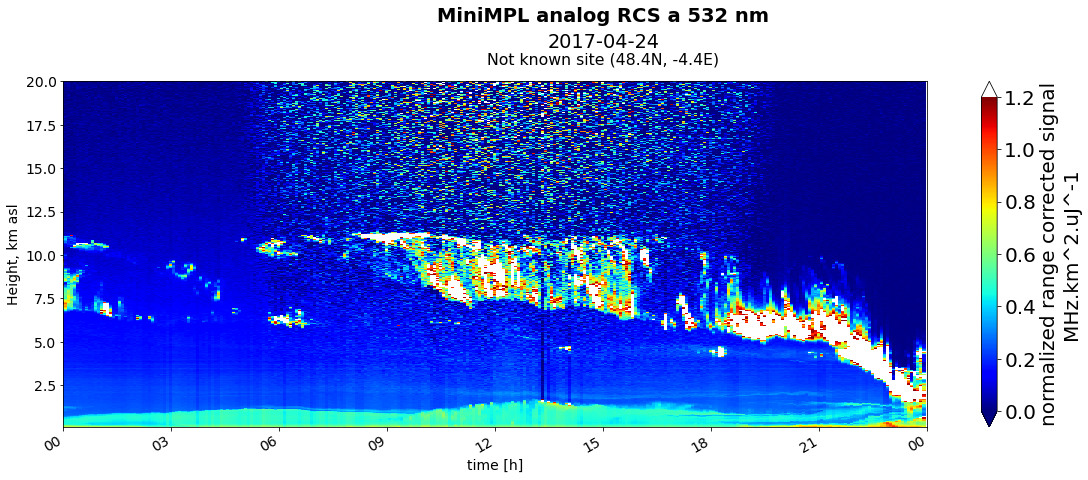

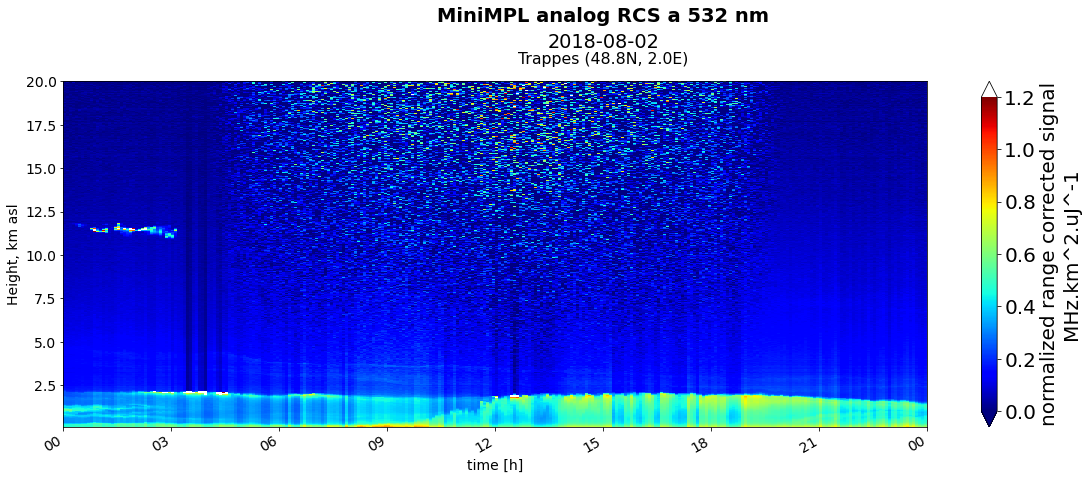

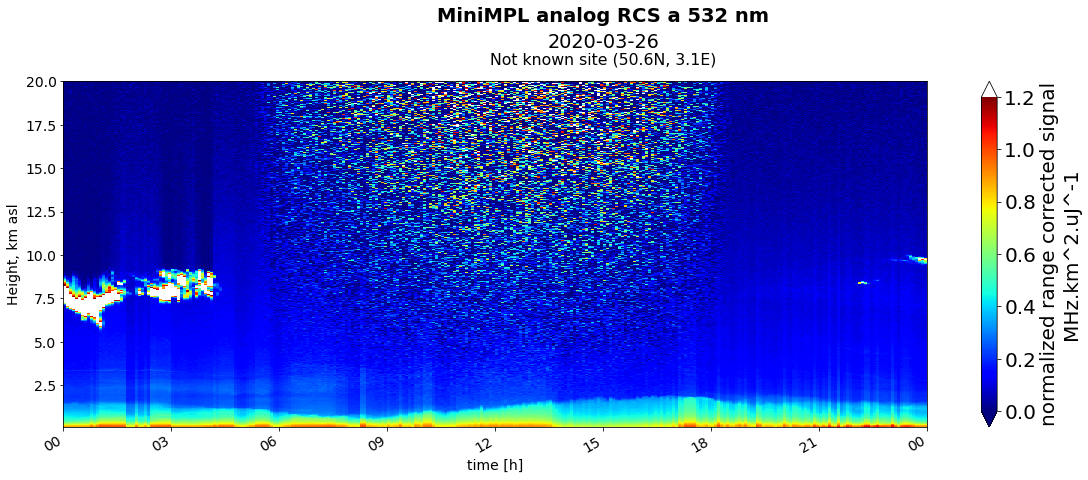

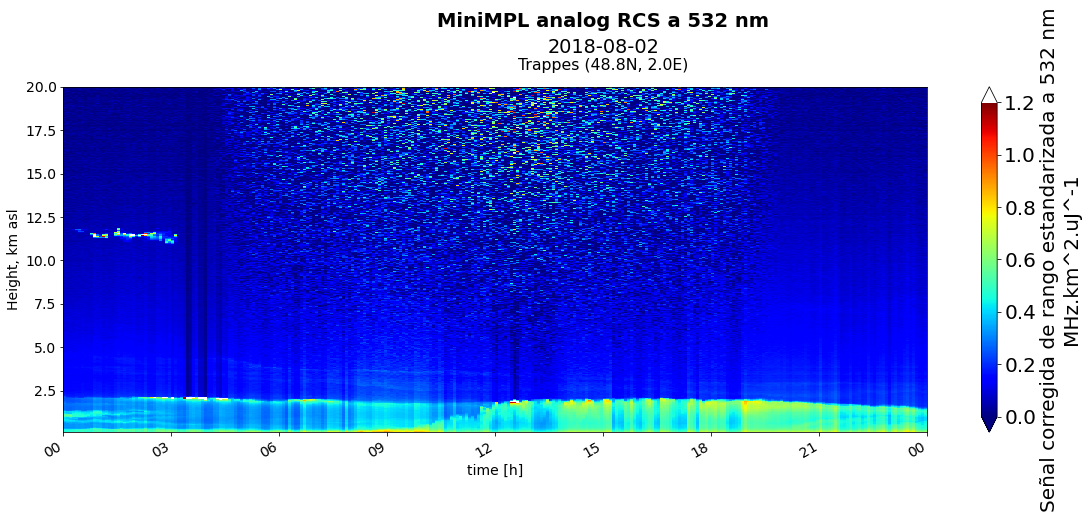

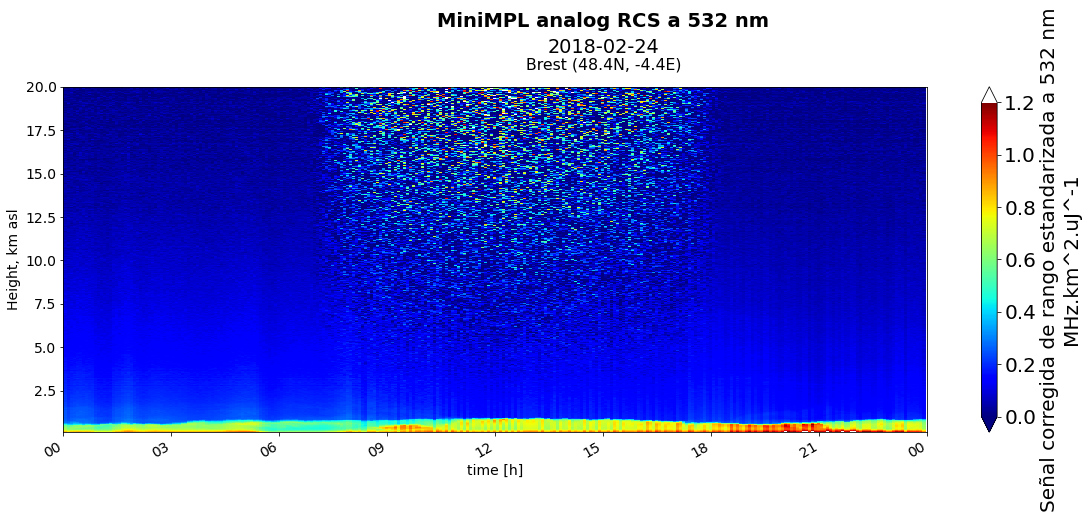

In [ ]:
for filename in filenames:
  ds = xr.load_dataset(filename)
  ds = ds.assign_coords(range=ds.range/1000)

  qt = 'RCS'
  wl = '532'
  signal_mode = 'analog'
  channel = 'rcs_0'


  fig, axes = plt.subplots(nrows=1, figsize=(15,6))

  plot_as_me(ds, 
            channel, 
            axes, 
            qt, 
            wl,
            signal_mode, 
            attrs=ds.attrs, 
            vmax=1.2,
            vmin=0,
            )

  axes.tick_params(axis='both', which='major', labelsize=14)
  axes.tick_params(axis='both', which='minor', labelsize=14)
  axes.tick_params(axis='both', which='major', labelsize=14)
  axes.tick_params(axis='both', which='minor', labelsize=14)
  axes.set_xlabel('time [h]', fontsize=14)
  axes.set_ylabel('Height, km asl', fontsize=14)
  # year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  # out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  # fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  # fl_name = os.path.join(out_dir, fl_name)
  # plt.savefig(fl_name, dpi=200)

In [ ]:
filenames = ['/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5025_20180802.nc', 
             '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5029_20180224.nc']

blh_human_path = '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/blh-from-human/'
blh_lidar_path = '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/blh-from-lidar/'

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


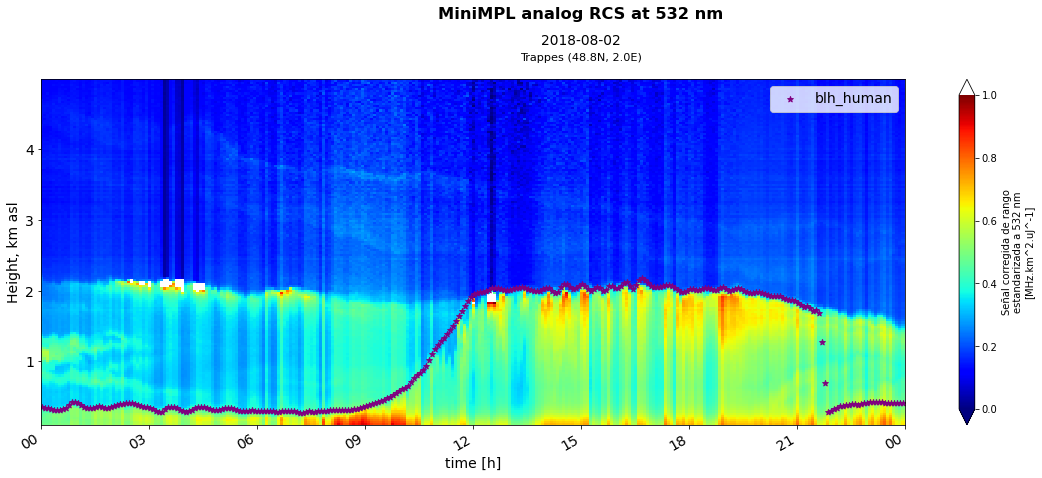

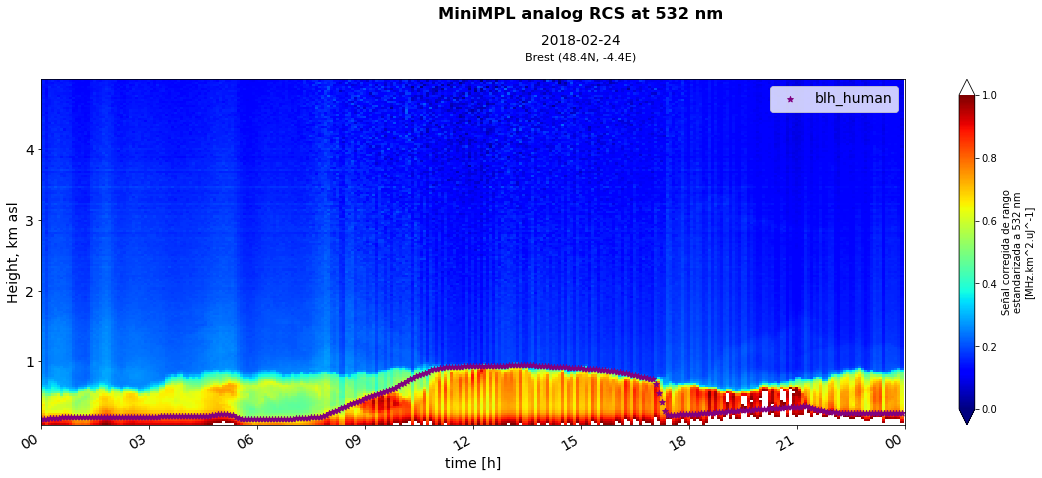

In [ ]:
for filename in filenames:
  date = filename.split('/')[-1].split('.')[0].split('_')[-1]

  ds = xr.load_dataset(filename)
  ds = ds.assign_coords(range=ds.range/1000)
  site = site_location(float(ds.lat.data[0]), float(ds.lon.data[0]))

  qt = 'RCS'
  wl = '532'
  signal_mode = 'analog'
  channel = 'rcs_0'


  fig, axes = plt.subplots(nrows=1, figsize=(15,6))

  plot_as_me(ds, 
            channel, 
            axes, 
            qt, 
            wl,
            signal_mode, 
            attrs=ds.attrs, 
            vmax=1,
            vmin=0,
            )
  blh_human_filename = glob.glob(blh_human_path + '*' + date + '*')[0]
  blh_human = pd.read_csv(blh_human_filename)
  blh_human.t_values = blh_human.t_values.apply(pd.Timestamp.fromtimestamp)

  blh_lidar_filename = glob.glob(blh_lidar_path + '*' + site + '*')[0]
  blh_lidar = xr.load_dataset(blh_lidar_filename, decode_times=False)
  blh_lidar.assign_coords(time=[pd.Timestamp.fromtimestamp(date) for date in blh_lidar.time.values])

  plt.scatter(blh_human.t_values, blh_human.blh_ref/1000, c='purple', s=None, marker='*', label='blh_human')
  # blh_lidar.plot.scatter(x='time', y='BLH_INDUS')
  # plt.scatter(blh_lidar.time, blh_lidar.BLH_INDUS)
  plt.legend(fontsize=14)
  # pdb.set_trace()
  axes.tick_params(axis='both', which='major', labelsize=14)
  axes.tick_params(axis='both', which='minor', labelsize=14)
  axes.tick_params(axis='both', which='major', labelsize=14)
  axes.tick_params(axis='both', which='minor', labelsize=14)
  axes.set_xlabel('time [h]', fontsize=14)
  axes.set_ylabel('Height, km asl', fontsize=14)

<class 'numpy.ndarray'>


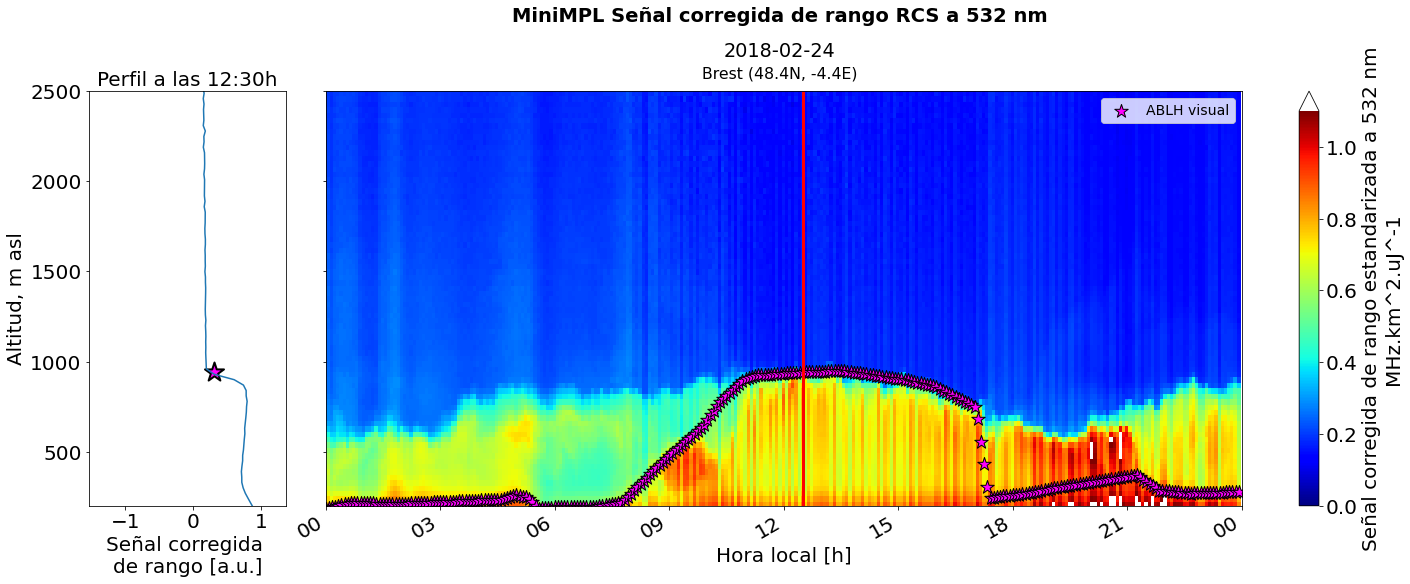

In [ ]:
channel = 'rcs_0'
qt = 'RCS'
wl = '532'
signal_mode = 'Señal corregida de rango'


filename = filenames[1]

date = filename.split('/')[-1].split('.')[0].split('_')[-1]

ds = xr.load_dataset(filename)
ds[channel].attrs['long_name'] = 'Señal corregida de rango estandarizada a 532 nm'

time_stamp = ds.time[150]

# ds = ds.assign_coords(range=ds.range/1000)
# site = site_location(float(ds.lat.data[0]), float(ds.lon.data[0]))




fig, axes = plt.subplots(nrows=1, figsize=(24,8))

ax1 = plt.subplot(1,6,(1))
# pdb.set_trace()
ds[channel].sel(time=time_stamp, method='nearest').plot(y='range', axes=ax1)
# plt.scatter(ds[channel].sel(time=time_stamp, altitude=rs.sel(time=time_stamp).BEST_BLH ,method='nearest').values, rs.sel(time=time_stamp).BEST_BLH, 
#             axes=ax1, s=400, c='yellow', marker='*', edgecolor='black', linewidth=2, label='ABLH Radiosonda')

ax2 = plt.subplot(1,6,(2,6), sharey=ax1)

plot_as_me(ds=ds.sel(range=slice(0, 2500)), 
          channel=channel, 
          axes=ax2, 
          qt=qt, 
          wl=wl,
          signal_mode=signal_mode, 
          attrs=ds.attrs, 
          vmax=1.1,
          vmin=0,
          )

blh_human_filename = glob.glob(blh_human_path + '*' + date + '*')[0]
blh_human = pd.read_csv(blh_human_filename)
blh_human.t_values = blh_human.t_values.apply(pd.Timestamp.fromtimestamp)
plt.scatter(blh_human.t_values, blh_human.blh_ref, axes=ax2, c='magenta', s=200, marker='*', edgecolor='black', linewidth=1, label='ABLH visual')
blh_human = xr.DataArray(data=blh_human.blh_ref, dims=['time'], coords=dict(time=blh_human.t_values))
ax1.scatter(ds[channel].sel(time=time_stamp, range=blh_human.sel(time=time_stamp, method='nearest'), method='nearest').values, 
            blh_human.sel(time=time_stamp, method='nearest'), axes=ax1, c='magenta', s=400, marker='*', edgecolor='black', linewidth=2)

endTime = time_stamp.values + np.timedelta64(1, 's')
start = mpl.dates.date2num(time_stamp.values)
end = mpl.dates.date2num(endTime)
width = end - start
rect = mpl.patches.Rectangle((start, 0), width, 2500, linewidth=3,color='red',fill=False)
ax2.add_patch(rect)


plt.legend(fontsize=14)
# pdb.set_trace()
ax2.set_ylim([200, 2500])
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.tick_params(axis='both', which='minor', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='minor', labelsize=20)
ax2.set_xlabel('Hora local [h]', fontsize=20)
ax2.set_ylabel('', fontsize=20)
ax1.set_title('Perfil a las {}h'.format(str(time_stamp.values.astype('datetime64[m]'))[-5:]), fontsize=20)
ax1.set_ylabel('Altitud, m asl', fontsize=20)
ax1.set_xlabel('Señal corregida \nde rango [a.u.]', fontsize=20)
# ax1.set_xlim([-1, 13])
o_ = plt.setp(ax2.get_yticklabels(), visible=False)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.82,
                    wspace=0.2,
                    hspace=0.4)

In [ ]:
Trueblh_lidar = [pd.Timestamp.fromtimestamp(date) for date in blh_lidar.time.values]

# CEDA

In [ ]:
import pdb
import glob
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
def site_location(lat=0, lon=0):
  sites = {(48.44430160522461, -4.412300109863281): 'Brest', 
           (48.77284622192383, 2.012406349182129): 'Trappes'}
  try:
    return sites[(lat, lon)]
  except:
    return 'Not known site'

def title1(mytitle, coef):
    """
    inclus le titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """

    plt.figtext(0.5, 0.95, mytitle, fontsize=6.5*coef, fontweight='bold',
                horizontalalignment='center', verticalalignment='center')
    return


def title2(mytitle, coef):
    """
    inclus le sous titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """

    plt.figtext(0.5, 0.89, mytitle, fontsize=5.5*coef,
                horizontalalignment='center', verticalalignment='center')
    return


def title3(mytitle, coef):
    """
    inclus le sous sous titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """
    plt.figtext(0.5, 0.85, mytitle, fontsize=4.5*coef,
                horizontalalignment='center', verticalalignment='center')
    return

def gapsizer(ax, time, range, gapsize, colour='#c7c7c7'):
    """
    This function creates a rectangle of color 'colour' when time gap 
    are found in the array 'time'. 
    """
        # search for holes in data
    # --------------------------------------------------------------------
    dif_time = time[1:] - time[0:-1]
    print(type(dif_time))
    for index, delta in enumerate(dif_time):
        # pdb.set_trace()
        if delta > np.timedelta64(gapsize, 'm'):
            # missing hide bad data
            start = mdates.date2num(time[index])
            end = mdates.date2num(time[index + 1])
            width = end - start

            # Plot rectangle
            end = mdates.date2num(time[index + 1])
            rect = mpl.patches.Rectangle(
                (start, 0), width, np.nanmax(range),
                color=colour)
            ax.add_patch(rect)

def plot_as_me(ds, channel, axes, qt, wl, signal_mode, attrs, save_fig=False, **kwargs):
  cmap = mpl.cm.jet
  bounds = np.linspace(0, 100, 64)
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

  title1('MiniMPL {qt} a {wl} {wlu}'.format(instr=attrs['instrument_id'],
                                                            mode=signal_mode,
                                                            qt=qt,
                                                            wl=wl,
                                                            wlu='nm'), coef=2.5)
  title2(str(ds.time.values[0].astype('datetime64[D]')), coef=2.5)

  title3('{} ({:.1f}N, {:.1f}E)'.format(site_location(float(ds.station_latitude), float(ds.station_longitude)), 
                                           float(ds.station_latitude), 
                                           float(ds.station_longitude)), coef=2.5)
  
  q = ds[channel].sel(altitude=slice(0, 6000)).plot.pcolormesh(x='time', 
                 y='altitude', 
                 cmap='jet', 
                 vmin=kwargs['vmin'], 
                 vmax=kwargs['vmax'],
                 # norm=norm
                 )
  
  plt.subplots_adjust(left=0, bottom=0, right=1, top=0.8, wspace=0, hspace=0)
  myFmt = mdates.DateFormatter('%H')
  axes.xaxis.set_major_formatter(myFmt)
  

  gapsizer(axes, ds.time.values, ds.altitude, gapsize=6, colour='#c7c7c7')
  axes.set_xlim([ds.time[0].values.astype('datetime64[D]'), ds.time[0].values.astype('datetime64[D]')+np.timedelta64(1,'D')])
  q.cmap.set_over('white')
  if save_fig:
    year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
    out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
    fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
    fl_name = os.path.join(out_dir, fl_name)
    plt.savefig(fl_name, dpi=200)


In [ ]:
filenames = glob.glob('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/CEDA/FRANCE/BREST/2018/**/*.nc', recursive=True)
len(filenames)

82

In [ ]:
float(ds.station_latitude)

48.44430160522461

In [ ]:
qt = 'Coeficiente de retroesparcimiento atenuado'
wl = '532'
signal_mode = 'analog'
channel = 'attenuated_backscatter_0'


for filename in filenames[:50]:
  fig, axes = plt.subplots(nrows=1, figsize=(15,6))
  ds = xr.load_dataset(filename)
  # pdb.set_trace()
  ds[channel].attrs['long_name'] = 'Coeficiente de retroesparcimiento atenuado'
  plot_as_me(ds, 
            channel, 
            axes, 
            qt, 
            wl,
            signal_mode, 
            attrs=ds.attrs, 
            vmax=(ds.calibration_constant_0.mean()/1.5e4).values,
            vmin=0,
            )

  axes.tick_params(axis='both', which='major', labelsize=14)
  axes.tick_params(axis='both', which='minor', labelsize=14)
  axes.tick_params(axis='both', which='major', labelsize=14)
  axes.tick_params(axis='both', which='minor', labelsize=14)
  axes.set_xlabel('Hora local [h]', fontsize=14)
  axes.set_ylabel('Altitud m asl', fontsize=14)
  # year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  # out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  # fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  # fl_name = os.path.join(out_dir, fl_name)
  # plt.savefig(fl_name, dpi=200)

Output hidden; open in https://colab.research.google.com to view.